In [1]:
### Alternatively, load from file. copy paste this under the imports
data_dir = Path('/home/selinali/Documents/ms_synchrony/sessions/RatU/RatUDay2NSD')
sess = ProcessData(data_dir)
paradigm = np.load(sess.filePrefix.with_suffix('.paradigm.npy'),allow_pickle=True).item()
neurons = Neurons.from_dict(np.load(sess.filePrefix.with_suffix('.neurons.stable.npy'),allow_pickle=True).item())
start=paradigm['epochs']['start'][2]
stop=paradigm['epochs']['stop'][2]


NameError: name 'Path' is not defined

In [ ]:
%load_ext autoreload
%autoreload 2
from pathlib import Path
from neuropy.core.session import ProcessData
from neuropy.core.neurons import Neurons
from neuropy.analyses import correlations 
import numpy as np
import neuropy.analyses.ms_connectivity as msconn
import seaborn as sns
import matplotlib.pyplot as plt
import time
# get only sleep sessions
#### from sd_figure1_bs.ipynb
import subjects
i=5
brainstates = subjects.nsd.allsess[i].brainstates
paradigm = subjects.nsd.allsess[i].paradigm
neurons = subjects.nsd.allsess[i].neurons
# get POST
start=paradigm.starts[2]
stop=paradigm.stops[2]
chunk_starts = np.histogram_bin_edges([],bins=3,range=(start,stop))[:-1]
chunk_stops = np.histogram_bin_edges([],bins=3,range=(start,stop))[1:]
print(chunk_starts, chunk_stops)

/home/selinali/miniforge3/envs/NeuroPy2/lib/python3.11/site-packages/xarray/__init__.py:1: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  import pkg_resources


[12856. 23676. 34496.] [23676. 34496. 45316.]


In [ ]:
sleep=subjects.nsd.allsess[5].brainstates.label_slice(["REM","NREM"])
intervals = list(zip(sleep.starts,sleep.stops))
neu=[neurons.time_multislices(intervals,s,e) for s,e in zip(chunk_starts, chunk_stops)]
# alternatively, use 
# sleep_neurons = [neurons.time_slice(s,e) for s,e in zip(chunk_starts, chunk_stops)]
# first, which might be slightly slower.

In [ ]:
# Neurons
neu[0].t_start,neu[0].t_stop,neu[0].spiketrains

(12856.0,
 23676.0,
 array([array([14444.305     , 14444.35893333, 14444.49596667, ...,
               23636.3936    , 23636.43306667, 23636.47273333])    ,
        array([14444.31796667, 14444.3515    , 14444.36673333, ...,
               23636.19303333, 23636.41516667, 23636.46986667])    ,
        array([14444.3697    , 14444.4103    , 14444.43966667, ...,
               23628.14896667, 23632.84333333, 23633.93453333])    ,
        array([14444.39533333, 14444.47456667, 14444.5569    , ...,
               23636.45153333, 23636.4554    , 23636.4682    ])    ,
        array([14445.6094    , 14447.9844    , 14459.12256667, ...,
               23635.2633    , 23635.32523333, 23635.49636667])    ,
        array([14444.94596667, 14445.37146667, 14445.3906    , ...,
               23636.2836    , 23636.43743333, 23636.48553333])    ,
        array([14444.471     , 14444.5173    , 14444.55766667, ...,
               23635.68893333, 23635.96186667, 23636.4203    ])    ,
        array([14447.

In [ ]:
        # Reverse the mask from keep to discard
        # remove_intervals=[]
        # prev = t_start
        # for start, stop in intervals:
        #     assert start>=prev
        #     assert start<=stop
        #     if prev<start: 
        #         remove_intervals.append([prev,start])
        #     prev=stop
        # if prev<t_stop: remove_intervals.append([prev,t_stop])
        # remove_intervals=np.array(remove_intervals)


In [ ]:
intervals = list(zip(sleep.starts,sleep.stops))

intervals = np.array(sorted(intervals))
merged = []
for s,e in intervals:
    if not merged or s > merged[-1][1]:
        merged.append([s, e])
    else:
        merged[-1][1] = max(merged[-1][1], e)
merged[0][0]=max(1e6,merged[0][0])
merged[-1][-1]=min(1e10,merged[-1][-1])

In [219]:
subjects.nsd.allsess

[ProcessData(RatJ_Day2_2019-06-02_03-59-19.xml),
 ProcessData(RatK_Day2_2019-08-08_04-00-00.xml),
 ProcessData(RatN_Day2_2019-10-11_03-58-54.xml),
 ProcessData(RatS-Day2NSD-2020-11-27_10-22-29.xml),
 ProcessData(RatR_Day1NSD_2021-05-13_08-41-31.xml),
 ProcessData(RatU_Day2NSD_2021-07-24_08-16-38.xml),
 ProcessData(RatV_Day1NSD_2021-10-02_08-10-23.xml),
 ProcessData(RatV_Day3NSD_2021-10-07_08-10-12.xml)]

In [5]:
indices = np.argsort([neurons.spiketrains[_].shape[0] for _ in range(neurons.n_neurons)])

In [6]:
indices

array([117,  60, 105,  21, 188, 111, 181, 235,   9,  23, 194, 234, 119,
        90,  54, 187, 167, 176,  24,  82, 180, 107, 133, 128, 113, 205,
       224,  53, 129, 184,  96,  37, 161, 209, 198, 182, 190,  46,  95,
       192,  86, 212,  47, 162,  40,  58,  80,  63, 217, 163, 213, 193,
       140, 175, 156, 143, 232, 242, 208, 202,   5,  44, 201,  51, 137,
       238,  71, 216,  77, 229,  78, 220, 218, 145, 118, 112, 172, 214,
       165,   6, 122, 114,  73, 207,   2, 191, 233, 169,  27, 152, 131,
       200,  13, 132, 177,  88,  83,  34, 170, 142,  97,  84,  59, 130,
        26, 199, 183,  50, 243, 237, 225, 160, 246, 221,  42, 219,  33,
       222,  57, 115, 236, 211, 178,   7,  52, 240,  30,  75, 230, 210,
       136, 135,  11, 248, 127, 153, 244,  32,  92,  25, 203, 186,  56,
       125,  35, 239, 110, 102,  67,  19,  74, 166,  14, 227,  93,  81,
        87, 168, 196,  72, 174, 148, 173,  48,  65,  69,  62, 247, 164,
       206,  45, 171,  99,  16, 141, 139,  66, 154,  89,  18, 10

In [7]:
neurons.spiketrains[indices[0]].shape[0], neurons.spiketrains[indices[-1]].shape[0]

(3613, 3028035)

In [ ]:
neurons.get_neuron_type('pyr')
# get indices of pyr and ints
# calculate ccg between some pairs of them
# calculate strength of ccg
# TODO is there a data struture that stores connectivities

Neurons
 n_neurons: 151
 t_start: 0.0
 t_stop: 48498.5344
 neuron_type: ['pyr']

In [ ]:
print("data sampling rate\t", sess.recinfo.dat_sampling_rate)
print("eeg sampling rate\t", sess.recinfo.eeg_sampling_rate)
print("n_channels\t\t", sess.recinfo.n_channels)
print("signal dtype\t\t", sess.recinfo.sig_dtype)
print("skipped channels\t", sess.recinfo.skipped_channels)
print("discarded channels\t", sess.recinfo.discarded_channels)
print("source file\t\t", sess.recinfo.source_file)
# print(sess.recinfo.to_dict())
print("basepath\t\t", sess.basepath)
print("file prefix\t\t", sess.filePrefix)
print("probegroup\t\t", sess.probegroup)
print("channel groups\t\t",sess.recinfo.channel_groups)

data sampling rate	 30000
eeg sampling rate	 1250
n_channels		 192
signal dtype		 16
skipped channels	 [ 17 140 163]
discarded channels	 []
source file		 /home/selinali/Documents/ms_synchrony/sessions/RatU/RatUDay2NSD/RatU_Day2NSD_2021-07-24_08-16-38.xml
basepath		 /home/selinali/Documents/ms_synchrony/sessions/RatU/RatUDay2NSD
file prefix		 /home/selinali/Documents/ms_synchrony/sessions/RatU/RatUDay2NSD/RatU_Day2NSD_2021-07-24_08-16-38
probegroup		 <neuropy.core.probe.ProbeGroup object at 0x7f1fdd8e2ed0>
channel groups		 [[0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15]
 [16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31]
 [32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47]
 [48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63]
 [64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79]
 [80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95]
 [96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111]
 [112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127]
 [128 129 130 131 132 133 134 135 136 137 138 

In [115]:
import time
bin_size = 0.0005 # 0.5 ms
window_size = 0.02 # 20 ms

def get_ccg_timed(id1,id2):
    st=time.time()
    # get ccg between neurons 0 and 1
    neuron_inds = [id1, id2]
    ccg = correlations.spike_correlations(neurons, neuron_inds, sample_rate=sess.recinfo.dat_sampling_rate,
                                        bin_size=bin_size, window_size=window_size,use_cupy=True)
    end=time.time()
    print("time elapsed ", end-st)
    return ccg

In [116]:
# timing with cupy:
"""
shortest spiketrains in U day 4 session (two way)
time elapsed  0.8515679836273193
time elapsed  0.8398668766021729
longest spiketrains in U day 4 session (two way)
time elapsed  0.9864428043365479
time elapsed  0.9447596073150635
"""
# timing without using cupy:
"""
shortest spiketrains in U day 4 session (two way)
0.7386939525604248
0.7017326354980469
longest spiketrains in U day 4 session (two way)
1.7350304126739502
1.7177770137786865
"""
ccg01S=get_ccg_timed(indices[0],indices[1])
ccg10S=get_ccg_timed(indices[1],indices[0])

ccg01L=get_ccg_timed(indices[-1],indices[-2])
ccg10L=get_ccg_timed(indices[-2],indices[-1])

time elapsed  1.1474411487579346
time elapsed  0.8456809520721436
time elapsed  1.0230090618133545
time elapsed  0.977959156036377


In [ ]:
def get_ccg_timed_group(neuron_inds):
    st=time.time()
    # get ccg between neurons 0 and 1
    ccg = correlations.spike_correlations(neurons, neuron_inds, sample_rate=sess.recinfo.dat_sampling_rate,
                                        bin_size=bin_size, window_size=window_size,use_cupy=True)
    end=time.time()
    print("time elapsed ", end-st)
    return ccg

In [ ]:
# timing with cupy:
# time elapsed  2.0314290523529053

# timing without using cupy:
# time elapsed  11.44138479232788

ccg10L=get_ccg_timed_group(indices[-10:])

time elapsed  2.056055784225464


In [ ]:
ccg10L.shape

(10, 10, 41)

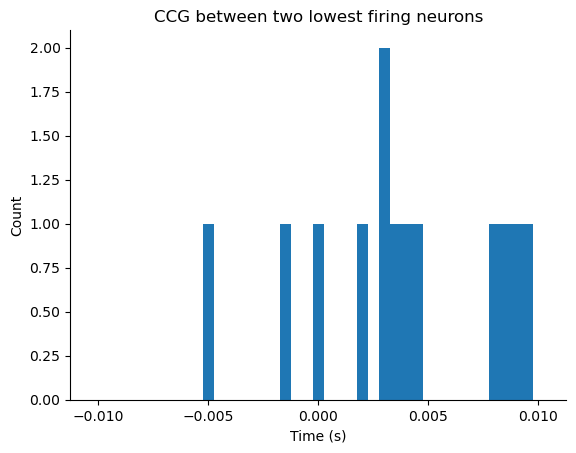

In [ ]:
import seaborn as sns
_, ax = plt.subplots()
bins = np.arange(-window_size / 2, window_size / 2 + bin_size, bin_size)
ax.bar(bins, ccg10S[1,0], width=bin_size)
ax.set_xlabel("Time (s)")
ax.set_ylabel("Count")
ax.set_title("CCG between two lowest firing neurons")
sns.despine(ax=ax)

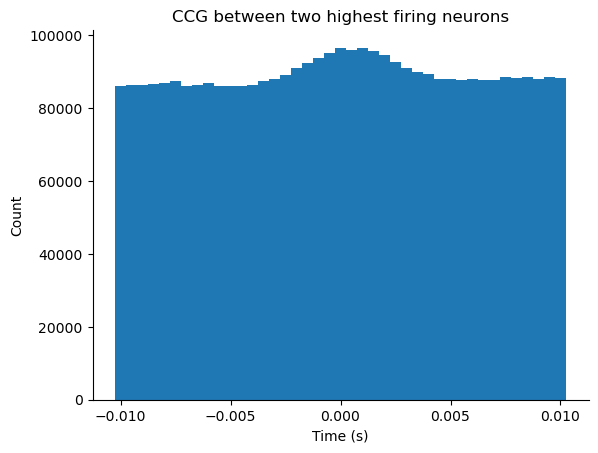

In [ ]:
import seaborn as sns
_, ax = plt.subplots()
bins = np.arange(-window_size / 2, window_size / 2 + bin_size, bin_size)
ax.bar(bins, ccg01L[0,1], width=bin_size)
ax.set_xlabel("Time (s)")
ax.set_ylabel("Count")
ax.set_title("CCG between two highest firing neurons")
sns.despine(ax=ax)

In [ ]:
sess.neurons=neurons

In [ ]:
nneurons = np.zeros((3,3))
frates = []
mean_firing_rates = np.zeros((3,3))
sd_firing_rates = np.zeros((3,3))
iqr =  np.zeros((3,3))
types = ['pyr','inter','mua']
for i in range(3): # sleep chunk
    for j in range(len(types)): # type: pyr, inter, mua
        neus = sleep_neurons[i].get_neuron_type(types[j])
        nneurons[i,j] = neus.n_neurons
        time_duration = chunk_stops[i]-chunk_starts[i]
        frate = [neus.spiketrains[_].shape[0] for _ in range(neus.n_neurons)]/time_duration
        frates.append([frate])
        mean_firing_rates[i,j] = np.mean(frate)
        sd_firing_rates[i,j] = np.std(frate)
        iqr[i,j]  = np.percentile(frate, 75)-np.percentile(frate, 25)

Load all labeled NSD sessions in Bapun's data

    # mean firing rates did not change across sleep chunks


In [ ]:
from pathlib import Path
from neuropy.core.session import ProcessData
from neuropy.core.neurons import Neurons
import neuropy.analyses.correlations as correlations
import numpy as np
import matplotlib.pyplot as plt

all_sess = ["RatS/Day2NSD",
            "RatR/Day1NSD",
            "RatV/RatVDay1NSD",
            "RatV/RatVDay3NSD",
            "RatU/RatUDay2NSD"]

for sess_name in all_sess:
    print("==================================")
    print(f"Basic info, {sess_name}")

    # Load data
    data_dir = Path(f'/home/selinali/Documents/ms_synchrony/sessions/{sess_name}')
    sess = ProcessData(data_dir)
    paradigm = np.load(sess.filePrefix.with_suffix('.paradigm.npy'),allow_pickle=True).item()

    # Chunk into 3h slep sessions
    start=paradigm['epochs']['start'][2]
    stop=paradigm['epochs']['stop'][2]
    chunk_starts = np.histogram_bin_edges([],bins=3,range=(start,stop))[:-1]
    chunk_stops = np.histogram_bin_edges([],bins=3,range=(start,stop))[1:]
    chunk_starts, chunk_stops
    neurons = Neurons.from_dict(np.load(sess.filePrefix.with_suffix('.neurons.stable.npy'),allow_pickle=True).item())
    sleep_neurons=[]
    for i in range(3):
        sleep_neurons.append(neurons.time_slice(chunk_starts[i],chunk_stops[i]))
    print(paradigm)

    # Get population stats
    nneurons = np.zeros((3,3))
    frates = []
    mean_firing_rates = np.zeros((3,3))
    sd_firing_rates = np.zeros((3,3))
    iqr =  np.zeros((3,3))
    types = ['pyr','inter','mua']
    for i in range(3): # sleep chunk
        for j in range(len(types)): # type: pyr, inter, mua
            neus = sleep_neurons[i].get_neuron_type(types[j])
            nneurons[i,j] = neus.n_neurons
            frate = [neus.spiketrains[_].shape[0] for _ in range(neus.n_neurons)]/time_duration
            frates.append([frate])
            time_duration = chunk_stops[i]-chunk_starts[i]
            mean_firing_rates[i,j] = np.mean(frate)
            sd_firing_rates[i,j] = np.std(frate)
            iqr[i,j]  = np.percentile(frate, 75)-np.percentile(frate, 25)
    # Standard t-test
    # check if mean firing rate changes over sleep per cell type
    from scipy.stats import ttest_ind
    pyr03,pyr46,pyr79=frates[0][0],frates[3][0],frates[6][0]
    int03,int46,int79=frates[1][0],frates[4][0],frates[7][0]
    mua03,mua46,mua79=frates[2][0],frates[5][0],frates[8][0]

    # Print
    print("n_neurons (pyr, int, mua)",nneurons[0])

    print(f"Mean firing rates P VALUES, {sess_name}")
    print("SLEEP1, SLEEP2, SLEEP3 are evenly chunked from POST")
    print("1. Pyramidal neurons")
    print("SLEEP1 VS SLEEP2 ", ttest_ind(pyr03,pyr46,equal_var=True).pvalue)
    print("SLEEP1 VS SLEEP3 ", ttest_ind(pyr03,pyr79,equal_var=True).pvalue)
    print("SLEEP2 VS SLEEP3 ", ttest_ind(pyr46,pyr79,equal_var=True).pvalue)
    print("2. Interneurons")
    print("SLEEP1 VS SLEEP2 ", ttest_ind(int03,int46,equal_var=True).pvalue)
    print("SLEEP1 VS SLEEP3 ", ttest_ind(int03,int79,equal_var=True).pvalue)
    print("SLEEP2 VS SLEEP3 ", ttest_ind(int46,int79,equal_var=True).pvalue)
    print("3. Multi-unit activities")
    print("SLEEP1 VS SLEEP2 ", ttest_ind(mua03,mua46,equal_var=True).pvalue)
    print("SLEEP1 VS SLEEP3 ", ttest_ind(mua03,mua79,equal_var=True).pvalue)
    print("SLEEP2 VS SLEEP3 ", ttest_ind(mua46,mua79,equal_var=True).pvalue)

    print("mean_firing_rates",mean_firing_rates)
    print("sd_firing_rates",sd_firing_rates)
    print("iqr 25%",iqr)
    print("==================================")

Basic info, RatS/Day2NSD
{'metadata': {}, 'epochs': {'start': {0: 0, 1: 2360, 2: 6033, 3: 36902}, 'stop': {0: 2358, 1: 6031, 2: 36899, 3: 40233}, 'label': {0: 'pre', 1: 'maze', 2: 'post', 3: 're-maze'}}}


NameError: name 'time_duration' is not defined

In [ ]:
print("mean_firing_rates",mean_firing_rates)
print("sd_firing_rates",sd_firing_rates)
print("iqr 25%",iqr)
print("nneurons",nneurons)

mean_firing_rates [[ 0.76174935 23.40442083  9.9865559 ]
 [ 0.70615612 21.99234442  9.83653119]
 [ 0.72449841 22.97850431 10.24840197]]
sd_firing_rates [[ 0.76751907 10.37316044 12.59902528]
 [ 0.61818271  9.45090633 12.45793539]
 [ 0.65495225  9.81591036 12.18445028]]
iqr 25% [[ 0.71130175 17.93597505 12.82372921]
 [ 0.70180222 16.13502773 13.33468115]
 [ 0.66081331 16.35469039 13.01915434]]
nneurons [[151.  12.  86.]
 [151.  12.  86.]
 [151.  12.  86.]]


In [ ]:
from scipy.stats import ttest_ind
pyr03,pyr46,pyr79=frates[0][0],frates[3][0],frates[6][0]
print("Mean firing rates P VALUES, RatUDay2NSD")
print("SLEEP1, SLEEP2, SLEEP3 are evenyl chunked from POST")
print("1. Pyramidal cells")
print("SLEEP1 VS SLEEP2 ", ttest_ind(pyr03,pyr46,equal_var=True).pvalue)
print("SLEEP1 VS SLEEP3 ", ttest_ind(pyr03,pyr79,equal_var=True).pvalue)
print("SLEEP2 VS SLEEP3 ", ttest_ind(pyr46,pyr79,equal_var=True).pvalue)
# mean firing rates did not change across sleep chunks

Mean firing rates P VALUES, RatUDay2NSD
SLEEP1, SLEEP2, SLEEP3 are evenyl chunked from POST
1. Pyramidal cells
SLEEP1 VS SLEEP2  0.5422113289654271
SLEEP1 VS SLEEP3  0.7101296357072364
SLEEP2 VS SLEEP3  0.8031944388696979


# jitter

In [ ]:
import neuropy.analyses.ms_connectivity as msconn
# jitter based synchrony index
ts = 0.0005 # bin size
tj = 0.005 # jitter timescale
window_size = 0.02
#50,-14
# Jitter
start=time.time()
ccg_jitters = msconn.ccg_jitter(neurons=neurons,
    neuron_inds=[indices[-14],indices[50]],
    sample_rate=30000,
    bin_size=ts,
    duration=window_size,
    jscale=ts*5,
    njitter=100,
    alpha=0.05,
    use_cupy=True,
)
# Jitter was really slow when pairwise. takes 20s for 10 jitters
end=time.time()
print(end-start)
# The new version runs ccg between all jitters - 
# 1000 jitters takes forever (>2m)
# 500 jitters takes 20s
# 100 jitters - 1.2s
# 200 jitters - 3s
# Still inefficient because we're calculating pairwise between jitters as well

shift 525
11.642866611480713


In [32]:
ccg=ccg_jitters[0]

In [149]:
pvals, ccgs, pred, qvals=msconn.pairwise_conn_fast(neurons,
    neuron_inds=None,
    sample_rate=30000,
    bin_size=1,
    duration=20,
    window_width=5,
    wintype="gauss", 
    hollow_frac=None,
    alpha=0.05,
    use_multi_correction=True,
    use_cupy=True,
    symmetrize_mode='odd',
)

KeyboardInterrupt: 

In [ ]:
duration=20
bin_size=1
alpha=0.05/(neurons.n_neurons**2)
args = {
        'min_lag':1,
        'max_lag':3,
        'min_spkcount':2.5,
        'spkcount_scope':12,
        'ignore_same_electrodes':True,
        'ref_type':'pyr',
        'target_type':['pyr','int'],
        'p':0.05,
    }
C=int(duration/bin_size//2) # center bin
start=int(args['min_lag']/bin_size)
end=int(args['max_lag']/bin_size)
coords_sig = np.argwhere((pvals<alpha).any(axis=-1))

In [ ]:
start,end

(1, 3)

In [ ]:
# significantly excitatory between 1-3ms
# coords1=coords1[coords1[:,0]<coords1[:,1]]
coords1 = coords_sig[:,0]*neurons.n_neurons+coords_sig[:,1]

In [ ]:
# constrain spike counts
coords2 = np.argwhere((ccgs[...,C+start:C+end]>1000).any(axis=-1))
# coords2=coords2[coords2[:,0]<coords2[:,1]]
coords2 = coords2[:,0]*neurons.n_neurons+coords2[:,1]

In [ ]:
coords=np.intersect1d(coords1,coords2)
coords=np.array([[x//neurons.n_neurons,x%neurons.n_neurons] for x in coords])

In [ ]:
coords.shape

(5189, 2)

In [ ]:
pyrs=neurons.get_neuron_type('pyr').neuron_ids
ints=neurons.get_neuron_type('inter').neuron_ids
locs=np.where((coords[:,0]!=coords[:,1]) & np.isin(coords[:,0],pyrs) & np.isin(coords[:,1],ints))[0]

In [ ]:
locs.shape

(77,)

In [ ]:
coords[locs]

array([[ 15,  14],
       [ 15, 215],
       [ 19, 215],
       [ 26, 215],
       [ 28, 215],
       [ 28, 247],
       [ 29, 215],
       [ 29, 227],
       [ 29, 247],
       [ 31, 215],
       [ 31, 247],
       [ 49, 215],
       [ 55, 215],
       [ 55, 227],
       [ 55, 229],
       [ 55, 247],
       [ 68, 215],
       [ 68, 247],
       [ 69, 215],
       [ 72, 215],
       [ 93, 215],
       [ 94, 215],
       [ 94, 227],
       [ 94, 247],
       [100,  14],
       [100, 186],
       [100, 215],
       [102, 215],
       [108, 186],
       [108, 215],
       [108, 219],
       [108, 227],
       [108, 247],
       [110, 215],
       [124,  14],
       [126, 215],
       [134, 186],
       [134, 215],
       [134, 227],
       [134, 247],
       [147, 215],
       [151, 186],
       [154, 215],
       [157, 215],
       [157, 247],
       [159, 215],
       [159, 227],
       [159, 247],
       [164, 215],
       [179,   5],
       [179, 215],
       [179, 219],
       [185,

In [ ]:
from scipy import ndimage
from scipy.signal import windows, convolve

W=5
hollow_frac = 0.6
sigma = W/2
W = int(6*sigma + (2 if W%2 else 1))
center = int(3*sigma + (0.5 if W%2 else 0))
print(center)
window = windows.gaussian(W,std=sigma)/(2*np.pi*sigma)
window[center]*=(1-hollow_frac)
window /= np.sum(window)

ccg_pad=np.concatenate([ccg[...,:W][...,::-1],ccg,ccg[...,-W:][...,::-1]],axis=-1)
# ccg_pad=ccg[np.newaxis,np.newaxis,...]
pred=ndimage.convolve1d(ccg_pad, window, axis=-1)[...,]
pred.shape

8


(2, 2, 56)

In [ ]:
def plot_ccg(ccgs, pvals, window_size, bin_size, inds, mode='even'):
    # example result - submillisecond synchrony
    _, ax = plt.subplots()
    x,y=inds
    # generating even-numbered bins
    if mode=='even':
        bins = np.arange(-window_size / 2-bin_size, window_size / 2+bin_size/2, bin_size)+bin_size/2
    else:
        bins = np.arange(-window_size / 2, window_size / 2+bin_size, bin_size)
    ax.bar(bins, ccgs[x,y], width=bin_size,alpha=0.5,label="ccg")
    # ax.bar(bins, pred[x,y], width=bin_size,alpha=0.5,label='ccg-smooth')
    # ax.plot(bins, pvals[x,y]*np.max(ccgs[x,y]), label='p')
    ax.set_xlabel("Time (millisecond)")
    ax.set_ylabel("Count")
    ax.set_title(f"CCG, neuron_inds=[{x},{y}]")
    ax.legend()
    sns.despine(ax=ax)

In [ ]:
window_size=20
bin_size=1


39297 [1598 1582 1569 1594 1635 1687 1665 1510 1463 1771 5318 2226 1563 1373
 1553 1683 1652 1632 1515 1577 1574 1557]


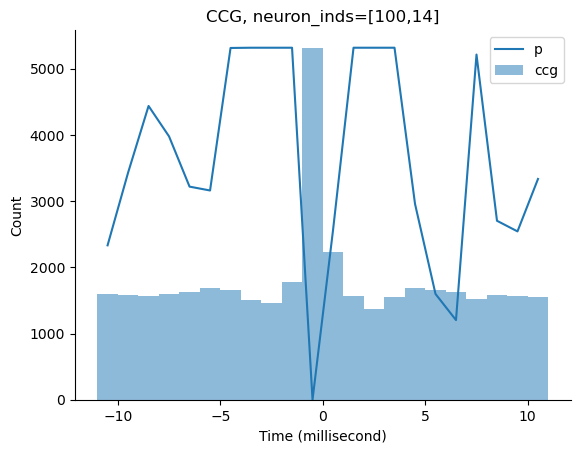

In [ ]:
plot_ccg(ccgs, pvals, window_size, bin_size, [100,14], mode='even')
print(ccgs[100,14].sum(),ccgs[100,14])

34322 [1562 1631 1558 1560 1638 1691 1593 1459 1392 1871 2412 1871 1392 1459
 1593 1691 1638 1560 1558 1631 1562]


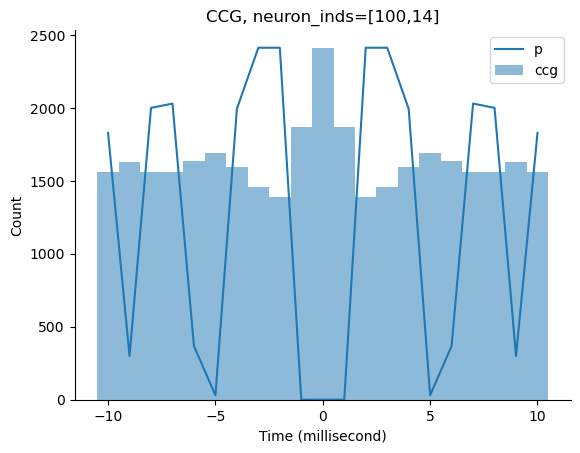

In [ ]:
plot_ccg(ccgs, pvals, window_size, bin_size, [100,14], mode='odd')
# plot_ccg(ccgs, pvals, [94,229], mode='odd')
print(ccgs[100,14].sum(),ccgs[100,14])

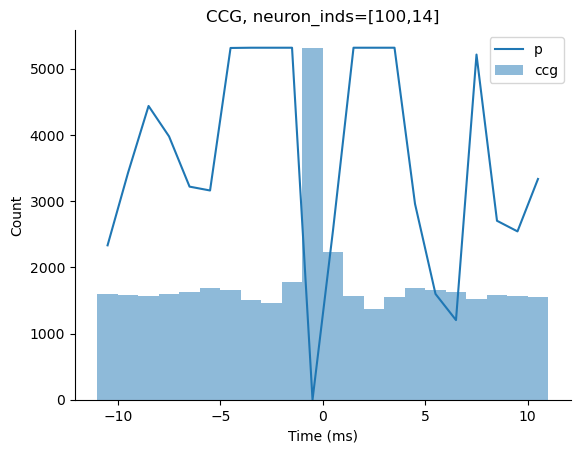

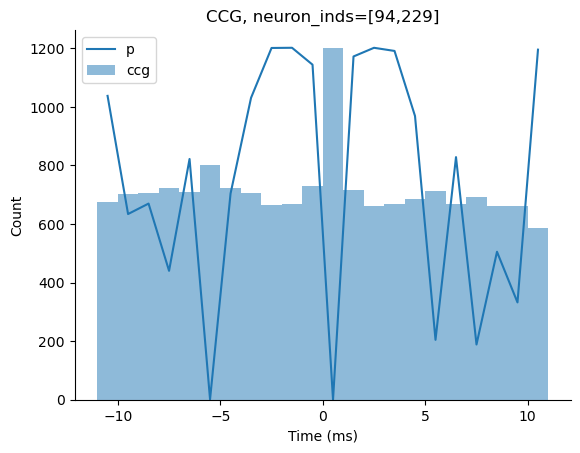

In [ ]:
plot_ccg(ccgs, pvals, window_size, bin_size, coords[locs[25]])
# plot_ccg(ccgs, coords[locs[23]])

In [208]:
# test equivalence of ccgs. 
# Use a very small bin size. 
# when bin size approaches the finest possible scale, ccgsE===ccgsO
# when bin size is large, ccgsE can be slightly larger due to extra time from the two edge bins
bin_size=1
window_size=10
window_width=1 # long window length doesn't work? pred and ccg shape incompatible
ind=(0,1)
pvalsE, ccgsE, predE, qvalsE=msconn.pairwise_conn_fast(neurons,
    neuron_inds=[100,14],
    sample_rate=30000,
    bin_size=bin_size,
    duration=window_size,
    window_width=window_width,
    wintype="gauss", 
    hollow_frac=None,
    alpha=0.05,
    use_multi_correction=True,
    use_cupy=True,
    symmetrize_mode='even',
)
print(ccgsE[ind].sum(),ccgsE[ind])

pvalsO, ccgsO, predO, qvalsO=msconn.pairwise_conn_fast(neurons,
    neuron_inds=[100,14],
    sample_rate=30000,
    bin_size=bin_size,
    duration=window_size,
    window_width=window_width,
    wintype="gauss", 
    hollow_frac=None,
    alpha=0.05,
    use_multi_correction=True,
    use_cupy=True,
    symmetrize_mode='odd',
)
print(ccgsO[ind].sum(),ccgsO[ind])

23464 [1652 1683 1553 1373 1563 2598 4946 1771 1463 1510 1665 1687]
21780 [1691 1593 1459 1392 1871 1578 3919 1875 1716 1405 1573 1708]


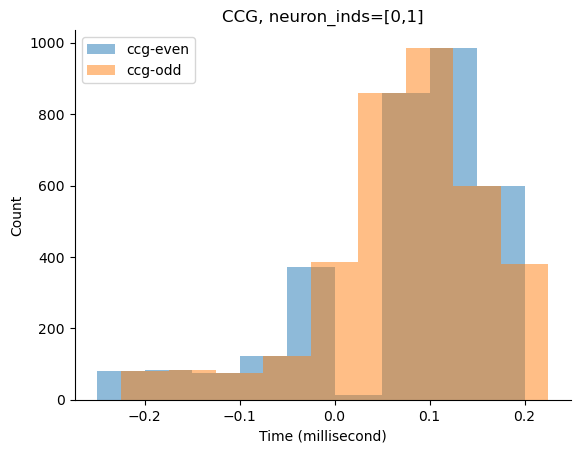

In [199]:
# example result - submillisecond synchrony
ind=(0,1)
C = int(window_size/bin_size//2)
scope = 4
_, ax = plt.subplots()
# generating even-numbered bins
even_bins = np.arange(-window_size / 2-bin_size, window_size / 2+bin_size/2, bin_size)+bin_size/2
odd_bins = np.arange(-window_size / 2, window_size / 2+bin_size, bin_size)
ax.bar(even_bins[C-scope:C+scope+1], ccgsE[ind][C-scope:C+scope+1], width=bin_size,alpha=0.5,label="ccg-even") # 373 13
ax.bar(odd_bins[C-scope:C+scope+1], ccgsO[ind][C-scope:C+scope+1], width=bin_size,alpha=0.5,label="ccg-odd") # 26
# ax.bar(bins, pred[x,y], width=bin_size,alpha=0.5,label='ccg-smooth')
# ax.plot(bins, pvals[x,y]*np.max(ccgs[x,y]), label='p')
ax.set_xlabel("Time (millisecond)")
ax.set_ylabel("Count")
ax.set_title(f"CCG, neuron_inds=[{ind[0]},{ind[1]}]")
ax.legend()
sns.despine(ax=ax)

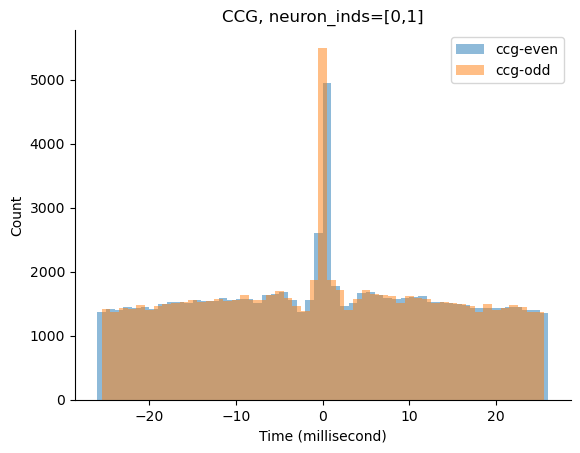

In [197]:
# example result - submillisecond synchrony
ind=(0,1)
C = int(window_size/bin_size//2)
scope = 4
_, ax = plt.subplots()
# generating even-numbered bins
even_bins = np.arange(-window_size / 2-bin_size, window_size / 2+bin_size/2, bin_size)+bin_size/2
odd_bins = np.arange(-window_size / 2, window_size / 2+bin_size, bin_size)
ax.bar(even_bins, ccgsE[ind], width=bin_size,alpha=0.5,label="ccg-even") # 373 13
ax.bar(odd_bins, ccgsO[ind], width=bin_size,alpha=0.5,label="ccg-odd") # 26
# ax.bar(bins, pred[x,y], width=bin_size,alpha=0.5,label='ccg-smooth')
# ax.plot(bins, pvals[x,y]*np.max(ccgs[x,y]), label='p')
ax.set_xlabel("Time (millisecond)")
ax.set_ylabel("Count")
ax.set_title(f"CCG, neuron_inds=[{ind[0]},{ind[1]}]")
ax.legend()
sns.despine(ax=ax)

#### Get short testing neurons

In [67]:
short_neurons = neurons.time_slice(t_start=10000,t_stop=10550)

In [68]:
correlations.cp_spike_correlations_2groups(neurons=short_neurons,
                                           ref_neuron_inds=0,
            neuron_inds=indices[-110:-107],
            sample_rate=neurons.sampling_rate,
            bin_size=0.001,
            window_size=0.005,
)

# 5 bins in 5ms window
# 30 samples per 1ms bin
# only ran two steps (shift=1,2) before stop
# neuron0=30, neuron1=216, neuron2=235

shift 4


array([[[18, 10, 14, 10],
        [21,  6, 16, 13],
        [ 5,  4,  6,  1]]], dtype=int32)

In [ ]:
timing,count=np.unique(spks,return_counts=True)
max(count)

In [59]:
allspks=np.concatenate(neurons.spiketrains)
timing,count=np.unique(allspks,return_counts=True)

In [60]:
allspks[np.argmax(count)]

32759.258066666665

In [32]:
spks=np.concatenate(short_neurons.spiketrains)
spks.sort()

In [ ]:
# block 2

from neuropy.plotting import plot_epochs, plot_hypnogram
from neuropy.core import Epoch
from neuropy import plotting

combine_wake = False
wake_append = "" if combine_wake else "_split_wake"
state_bin_size = 30 # seconds, 1 is default

fig = subjects.SdFig().fig1(18, 12)
subfig = fig.add_subfigure(fig.gs[0, :8])
axs = subfig.subplots(
    2, 2, sharex=True, sharey=True, gridspec_kw=dict(height_ratios=[1, 4], hspace=0.1)
)
# _, axs = plt.subplots(
#     2, 2, sharey="row", sharex="col", gridspec_kw=dict(height_ratios=[2, 1])
# )

for i in range(2):
    time = time_all[i]
    sxx = spect_all[i]
    post_t = np.arange(time[0], time[-1] + 10, 2.5 * 3600)
    zt_time = np.round(((post_t - time[0]) / 3600), 2)

    ax = axs[0, i]
    states = brainstates[i]

    # Change resolution
    if state_bin_size > 1:
        states = states.resample_labeled_epochs(state_bin_size, t_start=time[0], t_stop=time[-1], merge_neighbors=True)
        bin_append = f"_statebin{state_bin_size}"
        
    if combine_wake: # Combine wake states
        wk_states = states.label_slice(["AW", "QW"]).set_labels("WK").merge_neighbors()
        labels_order = ["NREM", "REM", "WK"]
    else: # Keep states split
        wk_states = states.label_slice(["AW", "QW"])
        labels_order = ["NREM", "REM", "QW", "AW"]
    slp_states = states.label_slice(["NREM", "REM"])
    all_states = slp_states + wk_states
    # Plot hypnogram
    sd_color = subjects.colors_sd(1)[1]
    rs_color = subjects.colors_rs(1)[0]
    grp = "NSD" if ("NSD" in str(sessions[i])) else "SD"
    colors = "k" if grp == "NSD" else {"SD": sd_color, "RS": rs_color}
    colorby = "label" if grp == "NSD" else "exp_stage"
    if grp == "SD":
        exp_stage = np.ones_like(all_states.labels)
        exp_stage[all_states.starts < (time[0] + 5 * 3600)] = "SD"
        exp_stage[all_states.starts >= (time[0] + 5 * 3600)] = "RS"
        all_states = all_states.add_column("exp_stage", exp_stage)
    plot_epochs(
        all_states,
        ax=ax,
        labels_order=labels_order,
        colors=colors,
        colorby=colorby,
        # colors=k,
        collapsed=False,
    )
    ax.set_xticks(post_t, zt_time)
    ax.set_axis_off()

    ax = axs[1, i]
    # ax = fig.subplot(fig.gs[:2,2*i:2*i+3])
    ax.imshow(
        # sxx*100,
        stats.zscore(sxx, axis=None),
        aspect="auto",
        cmap="plasma",
        vmax=1.3,
        origin="lower",
        extent=[time[0], time[-1], 1.5, 10],
    )
    ax.set_ylabel("Frequency (Hz)")
    ax.set_yticks([2, 4, 6, 8, 10])
    # axs[0,i].set_ylim(1.5,10)
    # ax.plot(time, theta_all[i]*100,'k')
    ax.set_xticks(post_t, zt_time)
    # ax.set_xticks([0, 2.5, 5.0, 7.5])

    # ax2 = axs[1,i].twinx()
    # ax2.plot(time, delta_all[i]*100,'r')
    # axs[1,i].set_xlim(left=time[0])
    # x_ticks = axs[1, i].get_xticks()
    # new_xticks = (x_ticks - time_all[i][0]) / 3600
    # axs[1,i].set_ylabel('Theta power\n(% session mean)')
    # axs[1,i].set_ylim(30,350)
    # axs[1,i].set_xticks(x_ticks,new_xticks.round(2))

fig.savefig(subjects.figpath_sd / f"sd_fig1_delta_theta_spect{wake_append}{bin_append}", dpi=300, format="svg")

In [ ]:
# block 1

from neuropy.plotting import plot_epochs, plot_hypnogram
from neuropy.core import Epoch
from neuropy import plotting

combine_wake = False
wake_append = "" if combine_wake else "_split_wake"
state_bin_size = 30 # seconds, 1 is default

fig = subjects.SdFig().fig1(18, 12)
subfig = fig.add_subfigure(fig.gs[0, :8])
axs = subfig.subplots(
    2, 2, sharex=True, sharey=True, gridspec_kw=dict(height_ratios=[1, 4], hspace=0.1)
)
# _, axs = plt.subplots(
#     2, 2, sharey="row", sharex="col", gridspec_kw=dict(height_ratios=[2, 1])
# )

for i in range(2):
    time = time_all[i]
    sxx = spect_all[i]
    post_t = np.arange(time[0], time[-1] + 10, 2.5 * 3600)
    zt_time = np.round(((post_t - time[0]) / 3600), 2)

    ax = axs[0, i]
    states = brainstates[i]

    # Change resolution
    if state_bin_size > 1:
        states = states.resample_labeled_epochs(state_bin_size, t_start=time[0], t_stop=time[-1], merge_neighbors=True)
        bin_append = f"_statebin{state_bin_size}"
        
    if combine_wake: # Combine wake states
        wk_states = states.label_slice(["AW", "QW"]).set_labels("WK").merge_neighbors()
        labels_order = ["NREM", "REM", "WK"]
    else: # Keep states split
        wk_states = states.label_slice(["AW", "QW"])
        labels_order = ["NREM", "REM", "QW", "AW"]
    slp_states = states.label_slice(["NREM", "REM"])
    all_states = slp_states + wk_states
    # Plot hypnogram
    sd_color = subjects.colors_sd(1)[1]
    rs_color = subjects.colors_rs(1)[0]
    grp = "NSD" if ("NSD" in str(sessions[i])) else "SD"
    colors = "k" if grp == "NSD" else {"SD": sd_color, "RS": rs_color}
    colorby = "label" if grp == "NSD" else "exp_stage"
    if grp == "SD":
        exp_stage = np.ones_like(all_states.labels)
        exp_stage[all_states.starts < (time[0] + 5 * 3600)] = "SD"
        exp_stage[all_states.starts >= (time[0] + 5 * 3600)] = "RS"
        all_states = all_states.add_column("exp_stage", exp_stage)
    plot_epochs(
        all_states,
        ax=ax,
        labels_order=labels_order,
        colors=colors,
        colorby=colorby,
        # colors=k,
        collapsed=False,
    )
    ax.set_xticks(post_t, zt_time)
    ax.set_axis_off()

    ax = axs[1, i]
    # ax = fig.subplot(fig.gs[:2,2*i:2*i+3])
    ax.imshow(
        # sxx*100,
        stats.zscore(sxx, axis=None),
        aspect="auto",
        cmap="plasma",
        vmax=1.3,
        origin="lower",
        extent=[time[0], time[-1], 1.5, 10],
    )
    ax.set_ylabel("Frequency (Hz)")
    ax.set_yticks([2, 4, 6, 8, 10])
    # axs[0,i].set_ylim(1.5,10)
    # ax.plot(time, theta_all[i]*100,'k')
    ax.set_xticks(post_t, zt_time)
    # ax.set_xticks([0, 2.5, 5.0, 7.5])

    # ax2 = axs[1,i].twinx()
    # ax2.plot(time, delta_all[i]*100,'r')
    # axs[1,i].set_xlim(left=time[0])
    # x_ticks = axs[1, i].get_xticks()
    # new_xticks = (x_ticks - time_all[i][0]) / 3600
    # axs[1,i].set_ylabel('Theta power\n(% session mean)')
    # axs[1,i].set_ylim(30,350)
    # axs[1,i].set_xticks(x_ticks,new_xticks.round(2))

fig.savefig(subjects.figpath_sd / f"sd_fig1_delta_theta_spect{wake_append}{bin_append}", dpi=300, format="svg")

In [ ]:
# block 1 modify
%load_ext autoreload
%autoreload 2
import sys

import matplotlib.pyplot as plt
import numpy as np
import subjects
import pandas as pd
import seaborn as sns
import scipy.signal as sg
from tqdm import tqdm
from scipy import stats

grpdata = subjects.GroupData()

from neuropy.plotting.epochs import plot_epochs

from neuropy.core import Signal
from scipy.ndimage import gaussian_filter1d
from neuropy.utils import signal_process

smooth = lambda x: gaussian_filter1d(x, sigma=60 / 4)
sessions = subjects.nsd.ratVday1 + subjects.sd.ratVday2
time_all, brainstates, spect_all = [], [], []
for sess in sessions:
    post = sess.paradigm["post"].flatten()
    t_start = post[0]
    t_stop = post[0] + 7.5 * 3600

    # Chan 191 was used for ratUDay2 and ratUDay4
    # signal = sess.eegfile.get_signal(191, t_start=t_start, t_stop=t_stop)
    chan = sess.best_channels.slow_wave
    signal = sess.eegfile.get_signal(chan, t_start=t_start, t_stop=t_stop)
    trace = signal.traces[0].astype("int16")

    if sess.artifact is not None:
        for e in sess.artifact.as_array():
            indx = (signal.time >= e[0]) & (signal.time <= e[1])
            trace[indx] = 1e-16

    signal = Signal(trace[np.newaxis, :], sampling_rate=1250, t_start=signal.t_start)
    spect = signal_process.FourierSg(signal, window=4, overlap=0, norm_sig=False)
    sxx = spect.freq_slice(1.5, 10).traces

    post_indx = (spect.time >= post[0]) & (spect.time <= t_stop)
    time_all.append(spect.time[post_indx])
    spect_all.append(sxx[:, post_indx])

    brainstates.append(sess.brainstates.time_slice(t_start, t_stop))

combine_wake = False
wake_append = "" if combine_wake else "_split_wake"
state_bin_size = 30 # seconds, 1 is default

fig = subjects.SdFig().fig1(18, 12)
subfig = fig.add_subfigure(fig.gs[0, :8])
axs = subfig.subplots(
    2, 2, sharex=True, sharey=True, gridspec_kw=dict(height_ratios=[1, 4], hspace=0.1)
)
# _, axs = plt.subplots(
#     2, 2, sharey="row", sharex="col", gridspec_kw=dict(height_ratios=[2, 1])
# )

for i in range(2):
    time = time_all[i]
    sxx = spect_all[i]
    post_t = np.arange(time[0], time[-1] + 10, 2.5 * 3600)
    zt_time = np.round(((post_t - time[0]) / 3600), 2)

    ax = axs[0, i]
    states = brainstates[i]

    # Change resolution
    if state_bin_size > 1:
        states = states.resample_labeled_epochs(state_bin_size, t_start=time[0], t_stop=time[-1], merge_neighbors=True)
        bin_append = f"_statebin{state_bin_size}"
        
    if combine_wake: # Combine wake states
        wk_states = states.label_slice(["AW", "QW"]).set_labels("WK").merge_neighbors()
        labels_order = ["NREM", "REM", "WK"]
    else: # Keep states split
        wk_states = states.label_slice(["AW", "QW"])
        labels_order = ["NREM", "REM", "QW", "AW"]
    slp_states = states.label_slice(["NREM", "REM"])
    all_states = slp_states + wk_states
    # Plot hypnogram
    sd_color = subjects.colors_sd(1)[1]
    rs_color = subjects.colors_rs(1)[0]
    grp = "NSD" if ("NSD" in str(sessions[i])) else "SD"
    colors = "k" if grp == "NSD" else {"SD": sd_color, "RS": rs_color}
    colorby = "label" if grp == "NSD" else "exp_stage"
    if grp == "SD":
        exp_stage = np.ones_like(all_states.labels)
        exp_stage[all_states.starts < (time[0] + 5 * 3600)] = "SD"
        exp_stage[all_states.starts >= (time[0] + 5 * 3600)] = "RS"
        all_states = all_states.add_column("exp_stage", exp_stage)
    plot_epochs(
        all_states,
        ax=ax,
        labels_order=labels_order,
        colors=colors,
        colorby=colorby,
        # colors=k,
        collapsed=False,
    )
    ax.set_xticks(post_t, zt_time)
    ax.set_axis_off()

    ax = axs[1, i]
    # ax = fig.subplot(fig.gs[:2,2*i:2*i+3])
    ax.imshow(
        # sxx*100,
        stats.zscore(sxx, axis=None),
        aspect="auto",
        cmap="plasma",
        vmax=1.3,
        origin="lower",
        extent=[time[0], time[-1], 1.5, 10],
    )
    ax.set_ylabel("Frequency (Hz)")
    ax.set_yticks([2, 4, 6, 8, 10])
    # axs[0,i].set_ylim(1.5,10)
    # ax.plot(time, theta_all[i]*100,'k')
    ax.set_xticks(post_t, zt_time)
    # ax.set_xticks([0, 2.5, 5.0, 7.5])

    # ax2 = axs[1,i].twinx()
    # ax2.plot(time, delta_all[i]*100,'r')
    # axs[1,i].set_xlim(left=time[0])
    # x_ticks = axs[1, i].get_xticks()
    # new_xticks = (x_ticks - time_all[i][0]) / 3600
    # axs[1,i].set_ylabel('Theta power\n(% session mean)')
    # axs[1,i].set_ylim(30,350)
    # axs[1,i].set_xticks(x_ticks,new_xticks.round(2))

fig.savefig(subjects.figpath_sd / f"sd_fig1_delta_theta_spect{wake_append}{bin_append}", dpi=300, format="svg")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


AttributeError: 'ProcessData' object has no attribute 'best_channels'

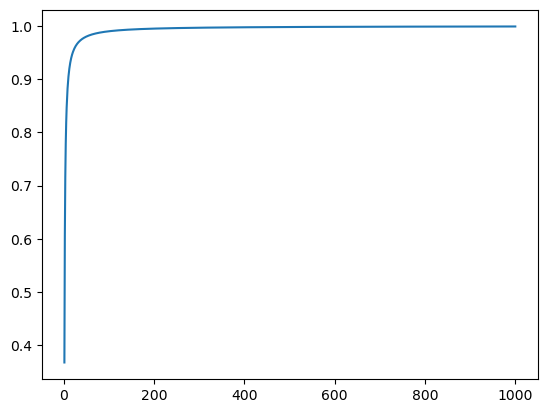

In [39]:
x=np.arange(1000)+1
y=np.exp(-1/x)
plt.plot(x,y)

#### minimum ISI

In [ ]:
np.min([np.diff(np.unique(i)).min()*1000 for i in neurons.get_neuron_type('pyr').spiketrains])

0.06666666740784422

In [ ]:
interspikes = np.concatenate([np.diff(i)*1000 for i in neurons.get_neuron_type('mua').spiketrains])
hist = np.histogram(interspikes[interspikes<2],bins=50)

In [78]:
hist

(array([   66,   267,   359,   262,   457,   489,   329,   351,   338,
          404,   337,   208,   955, 37883, 66415, 48594, 36988, 35936,
        35232, 49684, 47194, 31571, 29673, 30536, 38949, 51389, 30790,
        29921, 31539, 50645, 44393, 32146, 31756, 31946, 42246, 54684,
        31680, 33245, 31164, 51792, 44582, 31662, 31669, 32137, 43569,
        54406, 33575, 32388, 33606, 41115]),
 array([0.  , 0.04, 0.08, 0.12, 0.16, 0.2 , 0.24, 0.28, 0.32, 0.36, 0.4 ,
        0.44, 0.48, 0.52, 0.56, 0.6 , 0.64, 0.68, 0.72, 0.76, 0.8 , 0.84,
        0.88, 0.92, 0.96, 1.  , 1.04, 1.08, 1.12, 1.16, 1.2 , 1.24, 1.28,
        1.32, 1.36, 1.4 , 1.44, 1.48, 1.52, 1.56, 1.6 , 1.64, 1.68, 1.72,
        1.76, 1.8 , 1.84, 1.88, 1.92, 1.96, 2.  ]))

In [41]:
interspikes = [np.sum(np.diff(i)<1e-4)==0 for i in neurons.get_neuron_type('pyr').spiketrains]
hist = np.histogram(interspikes,bins=10)

/tmp/ipykernel_3519858/3276031069.py:2: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
  hist = np.histogram(interspikes,bins=10)


In [42]:
hist

(array([  6,   0,   0,   0,   0,   0,   0,   0,   0, 145]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]))

#### conv test

In [99]:
ccg=ccg_jitters[0][0]

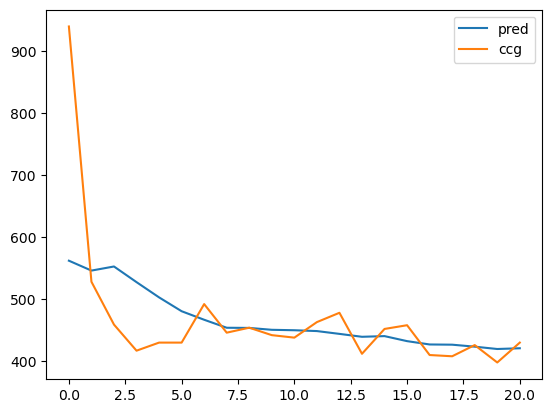

In [ ]:
plt.plot(pred,label="pred")
plt.plot(ccg,label="ccg")
plt.legend()